In [2]:
# Install pytesseract
!pip install pytesseract

# Install Tesseract OCR (required for pytesseract)
!apt-get install -y tesseract-ocr

# Add Tesseract OCR to the system path
import os
os.environ['PATH'] += os.pathsep + '/usr/local/bin'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,011 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [5]:
import cv2
import os

# Dosya yolunu oluştur
file_path = os.path.join(os.getcwd(), "plaka_resmi.jpg")

# Resmi oku
img = cv2.imread(file_path)

if img is not None:
    # Resmi işle
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Diğer işlemleri uygula
else:
    print("Resim okunamadı!")


Resim okunamadı!


In [14]:
import cv2
import pytesseract
import numpy as np

# Load the image
img = cv2.imread('image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to reduce noise
gray = cv2.bilateralFilter(gray, 11, 17, 17)

# Apply thresholding to segment the plate
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and find the plate
for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w)/h
    if area > 1000 and aspect_ratio > 2:
        cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
        roi = thresh[y:y+h, x:x+w]
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(roi, config=config)
        print("Detected Text: ", text)

# Display the output
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detected Text:  


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [22]:
import os

# Check if the image file exists
if os.path.exists('image.jpg'):
    # Load the image
    img = cv2.imread('image.jpg')
else:
    print('Error: Image file not found.')

Detected Text:  Beer. mien §

SF

B34ALP0S0



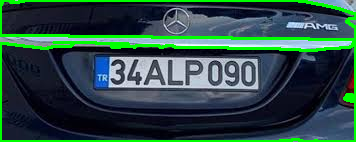

In [25]:
import cv2
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter to reduce noise
gray = cv2.bilateralFilter(gray, 11, 17, 17)

# Apply thresholding to segment the plate
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and find the plate
for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w)/h
    if area > 1000 and aspect_ratio > 2:
        cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
        roi = thresh[y:y+h, x:x+w]
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(roi, config=config)
        print("Detected Text: ", text)

# Display the output
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

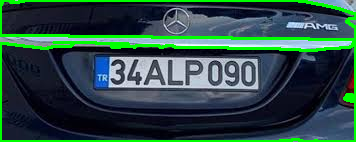

In [26]:
from google.colab.patches import cv2_imshow

# Resmi göster
cv2_imshow(img)


Tanınan Metin: E34ALP OSO Al

 
 
 

_—_—



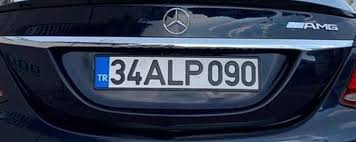

In [27]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Plaka görüntüsünü oku
plate_img = cv2.imread("/content/image.jpg")

# Plaka görüntüsündeki metinleri oku
text = pytesseract.image_to_string(plate_img)

# Tanınan metni yazdır
print("Tanınan Metin:", text)

# Görüntüyü ekranda göster
cv2_imshow(plate_img)
